In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
PATH_TO_DATA_FOLDER = "../input/fake-and-real-news-dataset"
fake = pd.read_csv(os.path.join(PATH_TO_DATA_FOLDER,'Fake.csv'))
true = pd.read_csv(os.path.join(PATH_TO_DATA_FOLDER,'True.csv'))

In [3]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

<AxesSubplot:>

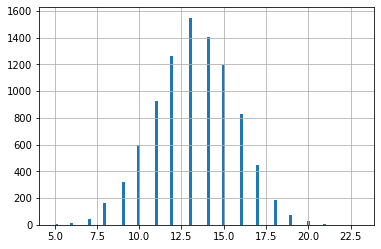

In [4]:
fake.loc[fake.subject.isin(['News']), 'title'].apply(lambda x: len(x.split())).hist(bins = 100)

In [5]:
true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [6]:
true = pd.DataFrame(true['title'].sample(12000, random_state = 1).reset_index(drop = True))
true['is_fake'] = 0

In [7]:
true.head(3)

,title,is_fake
0,Cambodian PM pulls back on threat to shut righ...,0
1,UK court agrees to extradite suspect in Italy ...,0
2,U.S. asks Venezuela for access to detained Cit...,0


In [8]:
fake = pd.DataFrame(fake.loc[fake.subject.isin(['News']), 'title'].sample(frac = 1, random_state = 1).reset_index(drop = True))
fake['is_fake'] = 1

In [9]:
fake.head(3)

,title,is_fake
0,Black Trump Adviser: Staff Doesn’t Care About...,1
1,Gold Star Dad Forced To Cancel Canada Trip Af...,1
2,"WATCH: Spicer Attacks Obama On Fox News, Then...",1


In [10]:
result = true.append(fake, ignore_index = True).sample(frac = 1, random_state = 1).reset_index(drop = True)

In [11]:
result

,title,is_fake
0,LISTEN: Dispatch Audio Reveals Cop Who Killed...,1
1,Zimbabwe's Mugabe: Beware of death on road to ...,0
2,Kenyan police fire tear gas at opposition lead...,0
3,Trump Went To Japan And Immediately Proved He...,1
4,Trump’s Ignorance Is Going To Turn The GOP Co...,1
...,...,...
21045,"South Korea, U.S. kick off large-scale air exe...",0
21046,Donald Trump Panicking As Ugly Divorce Record...,1
21047,Kerry defends trade deals against campaign att...,0
21048,Chuck Schumer: Republicans Have ‘Real Problem...,1


In [12]:
result.to_feather('fake_dataset_eng.feather')